In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Stolen from API practice because we need a url

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0f414cd345395c1f3f169b34786cf25


In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [15]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
 # Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

trail ca
tete mz
mercedes ar
muros es
lisakovsk kz
avarua ck
mar del plata ar
alice springs au
cayenne gf
qaanaaq gl
surin th
ponta do sol cv
omsukchan ru
imbituba br
butaritari ki
khatanga ru
cabo san lucas mx
cockburn town tc
bereda so
poum nc
sirjan ir
itarema br
busselton au
albany au
fairbanks us
westport nz
hilo us
saint george bm
fort nelson ca
nanortalik gl
pahrump us
new norfolk au
vardo no
ancud cl
chokurdakh ru
dikson ru
chapais ca
hilo us
saint-philippe re
svetlogorsk ru
kodiak us
saskylakh ru
cidreira br
mackenzie ca
punta arenas cl
sorland no
bukama cd
fredonia co
cockburn town tc
vaini to
ushuaia ar
hobart au
jining cn
barentsburg sj
kapaa us
kodiak us
batagay-alyta ru
saint-leu re
bethel us
port alfred za
albany au
pilar ph
palmer us
sisimiut gl
stornoway gb
albany au
atuona pf
jamestown sh
tasiilaq gl
atuona pf
pevek ru
luderitz na
barrow us
college us
illoqqortoormiut gl
albany au
port alfred za
puerto ayora ec
quatre cocos mu
port blair in
illoqqortoormiut gl
avarua 

georgetown sh
stephenville crossing ca
belushya guba ru
yellowknife ca
tuktoyaktuk ca
albany au
abeche td
ushuaia ar
eyl so
north bend us
mezen ru
cabo san lucas mx
bluff nz
amazar ru
sitka us
grindavik is
port alfred za
new norfolk au
college us
hermanus za
chara ru
pangai to
hobart au
ust-maya ru
arlit ne
thompson ca
hermanus za
mataura pf
nikolskoye ru
port blair in
umzimvubu za
kaeo nz
bredasdorp za
barrow us
grand river south east mu
bayan kw
jahrom ir
pisco pe
nyrob ru
severo-kurilsk ru
amderma ru
atuona pf
sorland no
talnakh ru
cabo san lucas mx
berlevag no
new norfolk au
nizhneyansk ru
inirida co
lorengau pg
lulea se
hilo us
ushuaia ar
thompson ca
rikitea pf
chuka ke
east london za
qaanaaq gl
geraldton au
mahebourg mu
bluff nz
namibe ao
illoqqortoormiut gl
port elizabeth za
bethel us
puerto ayora ec
severo-kurilsk ru
qaanaaq gl
praia da vitoria pt
nizhneyansk ru
sri aman my
jamestown sh
leningradskiy ru
albany au
oyem ga
asuncion py
arrifes pt
ponta do sol cv
santa luzia br
jam

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_desc = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Current Description":city_desc})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | trail
Processing Record 2 of Set 1 | tete
Processing Record 3 of Set 1 | mercedes
Processing Record 4 of Set 1 | muros
Processing Record 5 of Set 1 | lisakovsk
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | alice springs
Processing Record 9 of Set 1 | cayenne
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | surin
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | omsukchan
Processing Record 14 of Set 1 | imbituba
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | cockburn town
Processing Record 19 of Set 1 | bereda
Processing Record 20 of Set 1 | poum
Processing Record 21 of Set 1 | sirjan
Processing Record 22 of Set 1 | itarema
Processing Record 23 of Set 1 | busselton
Pr

Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | zhangye
Processing Record 43 of Set 4 | pousat
City not found. Skipping...
Processing Record 44 of Set 4 | kwinana
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | acapulco
Processing Record 47 of Set 4 | kozluk
Processing Record 48 of Set 4 | banda aceh
Processing Record 49 of Set 4 | auki
Processing Record 50 of Set 4 | mount isa
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | kemin
Processing Record 3 of Set 5 | bundaberg
Processing Record 4 of Set 5 | ode
Processing Record 5 of Set 5 | hede
Processing Record 6 of Set 5 | kollumerland
City not found. Skipping...
Processing Record 7 of Set 5 | saint-augustin
Processing Record 8 of Set 5 | gasa
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 11 of Set 5 | galle
Processing Record 12 of Set 5 | sorvag
City 

City not found. Skipping...
Processing Record 31 of Set 8 | nyrob
Processing Record 32 of Set 8 | inirida
Processing Record 33 of Set 8 | lulea
Processing Record 34 of Set 8 | chuka
Processing Record 35 of Set 8 | sri aman
Processing Record 36 of Set 8 | oyem
Processing Record 37 of Set 8 | asuncion
Processing Record 38 of Set 8 | arrifes
Processing Record 39 of Set 8 | santa luzia
Processing Record 40 of Set 8 | kampot
Processing Record 41 of Set 8 | mackay
Processing Record 42 of Set 8 | svobodnyy
Processing Record 43 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 44 of Set 8 | buraydah
Processing Record 45 of Set 8 | valparaiso
Processing Record 46 of Set 8 | camacha
Processing Record 47 of Set 8 | ornskoldsvik
Processing Record 48 of Set 8 | mehamn
Processing Record 49 of Set 8 | rio gallegos
Processing Record 50 of Set 8 | hwange
Processing Record 1 of Set 9 | constitucion
Processing Record 2 of Set 9 | patacamaya
Processing Record 3 of Set 9 | sentyabrskiy
C

Processing Record 20 of Set 12 | griffith
Processing Record 21 of Set 12 | najran
Processing Record 22 of Set 12 | bargal
City not found. Skipping...
Processing Record 23 of Set 12 | suez
Processing Record 24 of Set 12 | saquarema
Processing Record 25 of Set 12 | falealupo
City not found. Skipping...
Processing Record 26 of Set 12 | setermoen
Processing Record 27 of Set 12 | tallahassee
Processing Record 28 of Set 12 | esik
Processing Record 29 of Set 12 | ossora
Processing Record 30 of Set 12 | izazi
Processing Record 31 of Set 12 | naryshkino
Processing Record 32 of Set 12 | dunda
Processing Record 33 of Set 12 | oume
Processing Record 34 of Set 12 | tamandare
Processing Record 35 of Set 12 | port-gentil
Processing Record 36 of Set 12 | orcopampa
Processing Record 37 of Set 12 | anori
Processing Record 38 of Set 12 | alepe
Processing Record 39 of Set 12 | sola
Processing Record 40 of Set 12 | safaqis
City not found. Skipping...
Processing Record 41 of Set 12 | faya
Processing Record 

In [23]:
len(city_data)

549

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Current Description
0,Trail,49.0998,-117.7022,69.67,55,8,8.01,CA,2021-10-03 19:50:06,clear sky
1,Tete,-16.1564,33.5867,95.14,23,20,5.01,MZ,2021-10-03 19:50:06,few clouds
2,Mercedes,-34.6515,-59.4307,63.86,43,31,11.99,AR,2021-10-03 19:55:11,scattered clouds
3,Muros,42.7762,-9.0603,59.23,89,56,4.61,ES,2021-10-03 19:55:11,broken clouds
4,Lisakovsk,52.5369,62.4936,34.32,80,38,11.54,KZ,2021-10-03 19:55:12,scattered clouds
5,Avarua,-21.2078,-159.7750,77.05,69,75,9.22,CK,2021-10-03 19:55:13,broken clouds
6,Mar Del Plata,-38.0023,-57.5575,55.42,53,0,18.99,AR,2021-10-03 19:55:13,clear sky
7,Alice Springs,-23.7000,133.8833,53.15,50,0,0.00,AU,2021-10-03 19:55:14,clear sky
8,Cayenne,4.9333,-52.3333,89.64,72,0,3.00,GF,2021-10-03 19:49:21,clear sky
9,Qaanaaq,77.4840,-69.3632,31.21,97,100,7.11,GL,2021-10-03 19:50:10,light snow


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Current Description"]
city_data_df = city_data_df[new_column_order]

In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

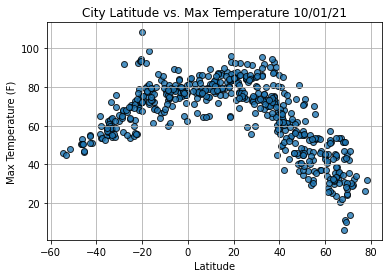

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

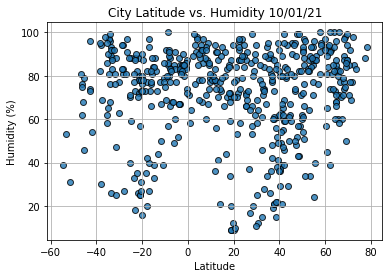

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

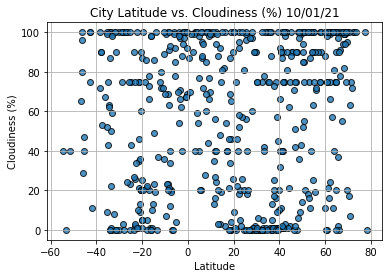

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

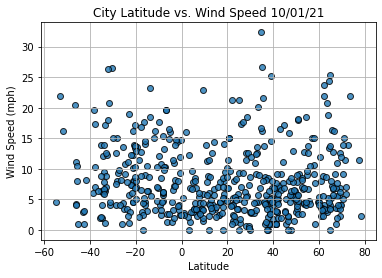

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

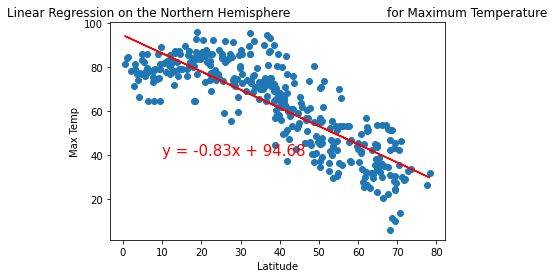

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

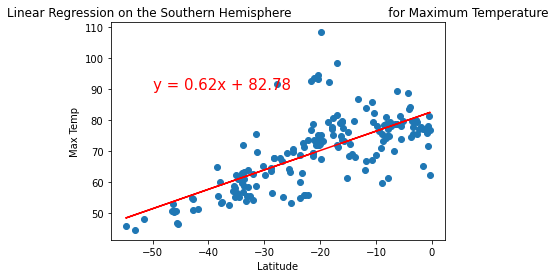

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

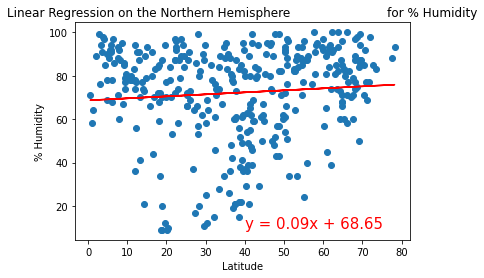

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

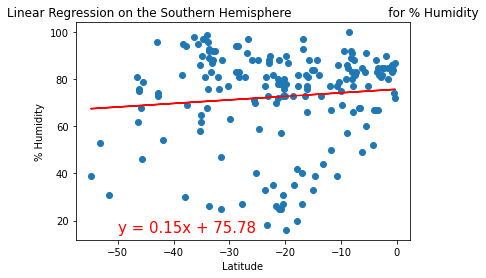

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

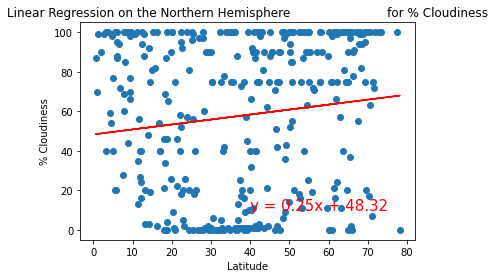

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

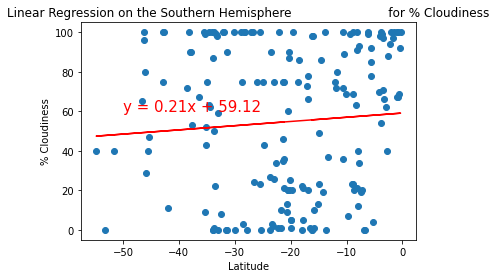

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

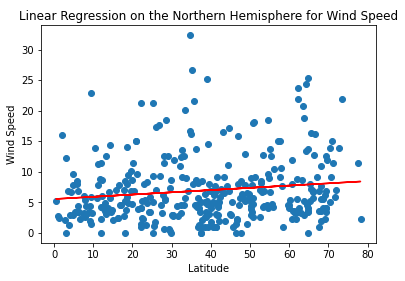

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

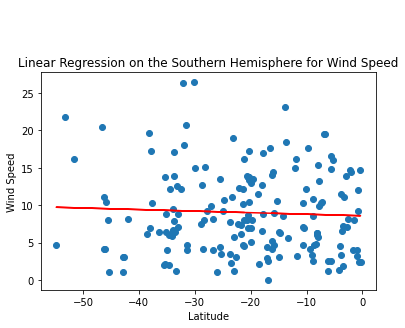

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [3]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 63.9,
  'feels_like': 63.93,
  'temp_min': 59.38,
  'temp_max': 70.36,
  'pressure': 1015,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 138, 'gust': 8.01},
 'clouds': {'all': 90},
 'dt': 1633290205,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1633257816,
  'sunset': 1633299753},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [4]:
# Get the JSON data.
boston_data = city_weather.json()

In [10]:
boston_data["weather"][0]["description"]

'overcast clouds'